### Adding libraries for the analysis

In [344]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')

### Loading the customer dataset for loan from the csv file

In [345]:
customer_data_set = pd.read_csv('loan.csv')
customer_data_set.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [346]:
customer_data_set.shape


(39717, 111)

In [347]:
customer_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 30.0+ MB


In [348]:
pd.set_option('display.max_columns',115)
pd.set_option('display.max_rows',200)

### Segmenting the dataset to find the categorical variables and numerical variables

In [349]:
customer_data_set.nunique()

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


### removing empty rows from the data set


In [350]:
customer_data_set.dropna(how='all',inplace=True)

### remove duplicate Rows from dataset

In [351]:
customer_data_set.drop_duplicates()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### removing empty columns from the data set


In [352]:
customer_data_set.dropna(how='all',inplace=True,axis=1)

In [353]:
customer_data_set.shape

(39717, 57)

In [354]:
unused_and_behavioral_column = ['id','desc','acc_now_delinq','pymnt_plan','member_id','title','emp_title','zip_code','url','last_credit_pull_d','out_prncp_inv','tax_liens','mths_since_last_delinq','out_prncp','mths_since_last_record','total_rec_int','total_rec_late_fee','collections_12_mths_ex_med','application_type','policy_code','initial_list_status',"collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq","total_rec_prncp", "total_rec_int", "total_rec_late_fee",'delinq_amnt','delinq_2yrs','earliest_cr_line','installment','revol_bal','revol_util']
customer_data_set.drop(unused_and_behavioral_column,inplace=True,axis=1)

In [355]:
customer_data_set['loan_amnt'] = customer_data_set['loan_amnt'].astype('float64') 
customer_data_set['funded_amnt'] = customer_data_set['funded_amnt'].astype('float64') 

In [356]:
category_coln = ['term','grade','verification_status','loan_status','purpose','home_ownership','sub_grade','pub_rec']
customer_data_set[category_coln].dtypes

term                   object
grade                  object
verification_status    object
loan_status            object
purpose                object
home_ownership         object
sub_grade              object
pub_rec                 int64
dtype: object

In [357]:
customer_data_set.issue_d = pd.to_datetime(customer_data_set.issue_d, format='%b-%y')
customer_data_set['year']=customer_data_set['issue_d'].dt.year.astype('float')
customer_data_set['month']=customer_data_set['issue_d'].dt.month.astype('float')

In [358]:
numerical_coln = ['year','month','loan_amnt','funded_amnt','funded_amnt_inv','int_rate','annual_inc','dti','emp_length']
customer_data_set[numerical_coln].dtypes

year               float64
month              float64
loan_amnt          float64
funded_amnt        float64
funded_amnt_inv    float64
int_rate            object
annual_inc         float64
dti                float64
emp_length          object
dtype: object

### Converting interest_rate and emp_length into numbers for analysis

In [359]:
customer_data_set['int_rate'] = customer_data_set.int_rate.str[:-1].apply(pd.to_numeric).astype('float')

In [360]:
customer_data_set[numerical_coln].dtypes

year               float64
month              float64
loan_amnt          float64
funded_amnt        float64
funded_amnt_inv    float64
int_rate           float64
annual_inc         float64
dti                float64
emp_length          object
dtype: object

In [361]:
customer_data_set.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
recoveries                 0
pub_rec_bankruptcies     697
year                       0
month                      0
dtype: int64

In [362]:
customer_data_set = customer_data_set.assign(emp_length = lambda x: x['emp_length'].str.extract('(\d+)'))

In [363]:
customer_data_set['emp_length'] = customer_data_set['emp_length'].apply(pd.to_numeric)

In [364]:
customer_data_set[numerical_coln] = customer_data_set[numerical_coln].apply(pd.to_numeric)

In [365]:
customer_data_set['emp_length'] = customer_data_set['emp_length'].fillna(customer_data_set['emp_length'].median())

In [366]:
print("Before cleaning:")
print(customer_data_set['pub_rec_bankruptcies'].isnull().sum())
print("After cleaning:")
customer_data_set['pub_rec_bankruptcies'].fillna('Not Known',inplace=True)
print(customer_data_set['pub_rec_bankruptcies'].isnull().sum())

Before cleaning:
697
After cleaning:
0


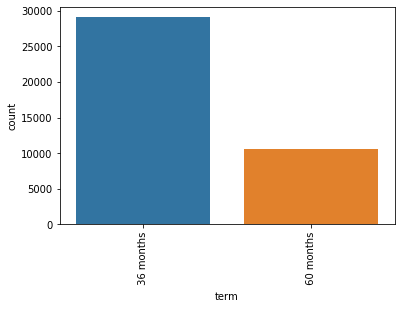

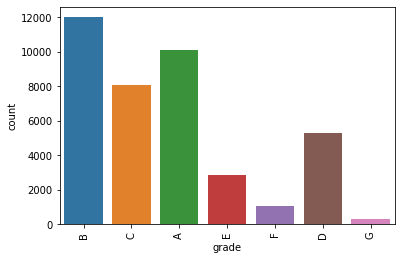

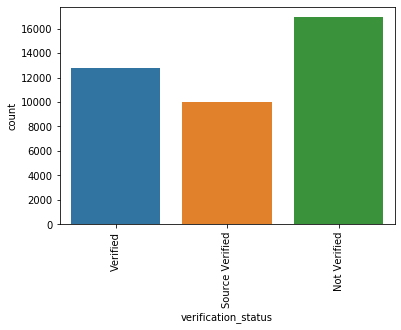

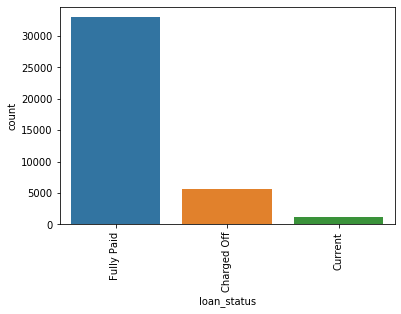

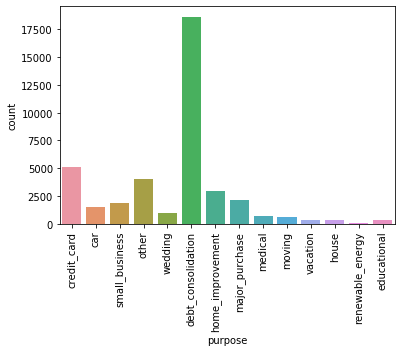

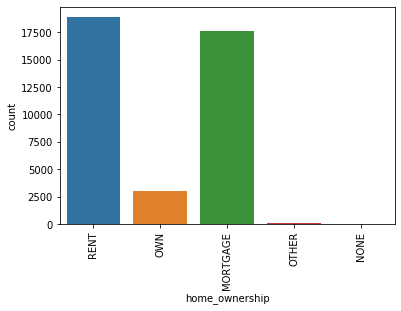

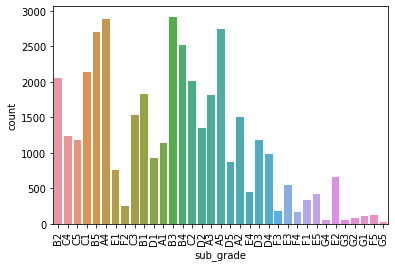

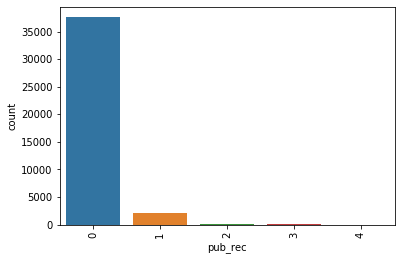

In [367]:
for i in category_coln :
    sns.countplot(x=i,data=customer_data_set)
    plt.xticks(rotation=90)
    plt.show()

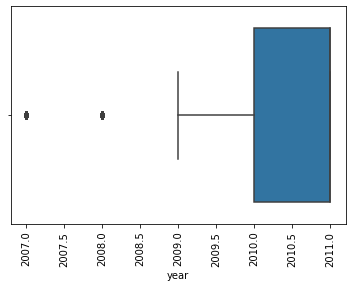

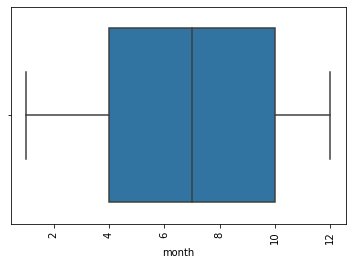

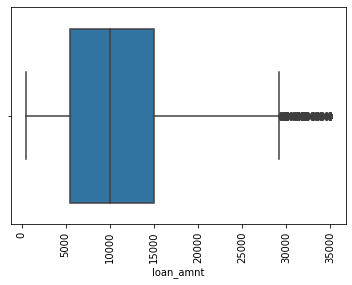

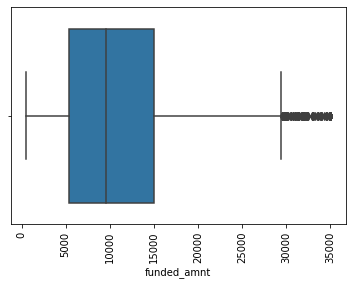

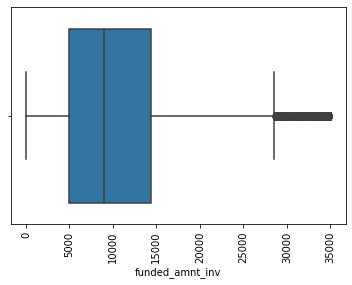

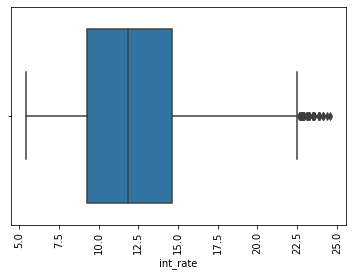

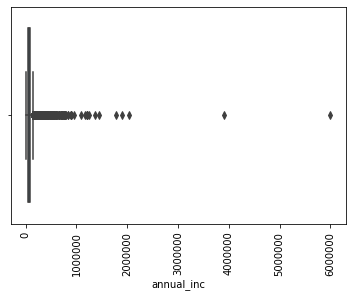

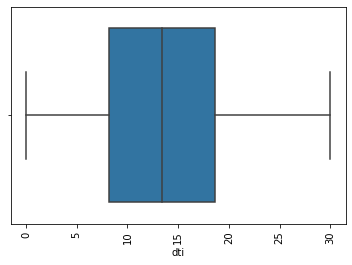

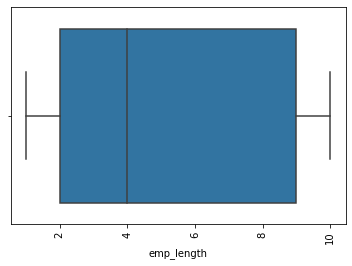

In [368]:
for i in numerical_coln :
    sns.boxplot(x=i,data=customer_data_set)
    plt.xticks(rotation=90)
    plt.show()

# Removing Outliners from numerical columns

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
count    38512.000000
mean     10534.148447
std       6457.350486
min        500.000000
25%       5125.000000
50%       9600.000000
75%      15000.000000
max      29900.000000
Name: loan_amnt, dtype: float64

Interquartile Spread is in between 5000 to 15000 for loan_amnt


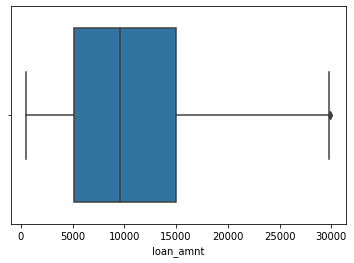

In [369]:
print(customer_data_set['loan_amnt'].describe())

#Checking loan_amnt after filtering outliers
filt = (customer_data_set['loan_amnt'] < 30000)
filtered_loan_data = customer_data_set[filt]
print(filtered_loan_data['loan_amnt'].describe())

print('\nInterquartile Spread is in between 5000 to 15000 for loan_amnt')
sns.boxplot(x='loan_amnt',data=filtered_loan_data)
plt.show()

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64
count    39045.000000
mean     10540.945063
std       6538.222776
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      30800.000000
Name: funded_amnt, dtype: float64

Interquartile Spread is in between 5000 to 15000 for funded_amnt


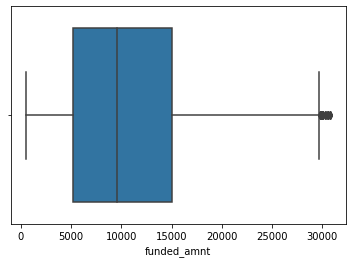

In [370]:
print(customer_data_set['funded_amnt'].describe())

#Checking funded_amnt after filtering outliers
filt = (customer_data_set['funded_amnt'] < 31000)
filtered_data = customer_data_set[filt]
print(filtered_data['funded_amnt'].describe())

print('\nInterquartile Spread is in between 5000 to 15000 for funded_amnt')
sns.boxplot(x='funded_amnt',data=filtered_data)
plt.show()

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64
count    38195.000000
mean     10157.799450
std       6073.924976
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14125.000000
max      35000.000000
Name: funded_amnt, dtype: float64

Interquartile Spread is in between 5000 to 14000 for funded_amnt_inv


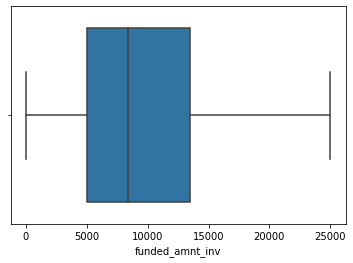

In [371]:
print(customer_data_set['funded_amnt_inv'].describe())

#Checking funded_amnt_inv after filtering outliers
filt = (customer_data_set['funded_amnt_inv'] < 25000)
filtered_funded_amnt_inv_data = customer_data_set[filt]
print(filtered_funded_amnt_inv_data['funded_amnt'].describe())

print('\nInterquartile Spread is in between 5000 to 14000 for funded_amnt_inv')
sns.boxplot(x='funded_amnt_inv',data=filtered_funded_amnt_inv_data)
plt.show()

In [372]:
customer_data_set['funded_amnt_inv'].describe()

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64
count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

Interquartile Spread is in between 9.25% to 14.5% for int_rate
Average Rate of intrest is 12%


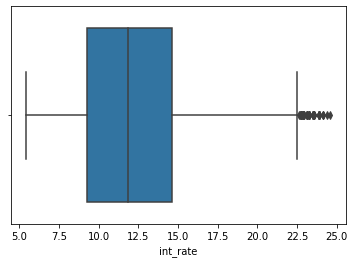

In [373]:
print(customer_data_set['int_rate'].describe())

#Checking int_rate after filtering outliers
filt = (customer_data_set['int_rate'] < 25)
filtered_int_rate_data = customer_data_set[filt]
print(filtered_int_rate_data['int_rate'].describe())

print('\nInterquartile Spread is in between 9.25% to 14.5% for int_rate')
print('Average Rate of intrest is 12%')
sns.boxplot(x='int_rate',data=filtered_int_rate_data)
plt.show()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
count     37305.000000
mean      60167.034315
std       26702.882564
min        4000.000000
25%       40000.000000
50%       55784.000000
75%       76400.000000
max      134748.000000
Name: annual_inc, dtype: float64

Interquartile Spread is in between 5000 to 76400 for annual_inc


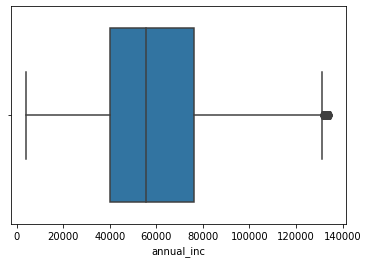

In [374]:
print(customer_data_set['annual_inc'].describe())

#Checking annual_inc after filtering outliers
filt = (customer_data_set['annual_inc'] < 135000)
customer_data_set = customer_data_set[filt]

#Removing annual_inc outliers from the loan dataset
print(customer_data_set['annual_inc'].describe())

print('\nInterquartile Spread is in between 5000 to 76400 for annual_inc')
sns.boxplot(x='annual_inc',data = customer_data_set)
plt.show()

count    37305.000000
mean         5.012733
std          3.349267
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         10.000000
Name: emp_length, dtype: float64

Interquartile Spread is in between 2 to 8 for employee length of Employment


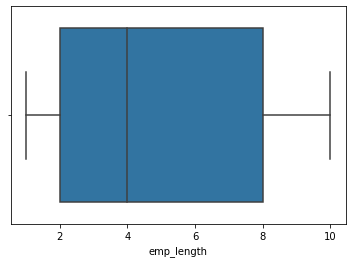

In [375]:
print(customer_data_set['emp_length'].describe())

print('\nInterquartile Spread is in between 2 to 8 for employee length of Employment')
sns.boxplot(x='emp_length',data = customer_data_set)
plt.show()

####  Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these columns except for annual Income.



# Analysis

## The Goal of this analysis is to determine the driving factors for the loan defaults and to see who is mostly likely to default.

#### 1.) Qualitative Variables
     category_coln = ['term','grade','verification_status','loan_status','purpose','home_ownership','sub_grade','pub_rec',pub_rec_bankruptcies]
#### 2.) Quantitative Variables
     numerical_coln = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','annual_inc','dti','emp_length']

# Univariate Analysis

### In this Analysis we will try to see mostly likely reasons for the loans to default, it is only possible with Fully Paid and ChargedOff Data.


### Visualizing Data 

In [376]:
filter = ((customer_data_set['loan_status'] == 'Charged Off') | (customer_data_set['loan_status'] == 'Fully Paid'))
customer_filtered_chargedOff = customer_data_set[filter]

# Segment analysis for charged off and Fully Paid customers to know more about it.

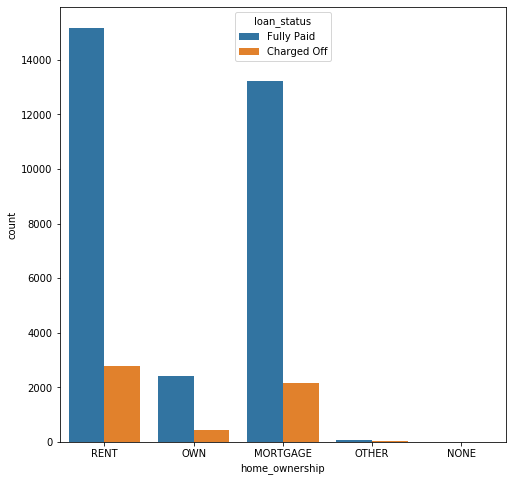

In [377]:
plt.figure(figsize=(8,8))
sns.countplot(x='home_ownership',hue='loan_status',data=customer_filtered_chargedOff)
plt.show()

# segment data showcase most of the defaults happens who lives in rent or have mortgage

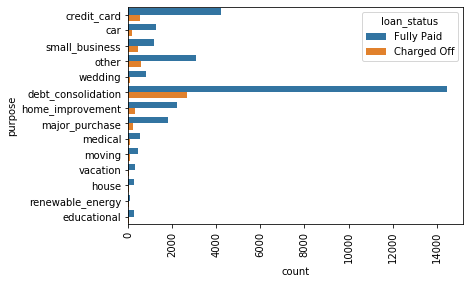

In [378]:
sns.countplot(y='purpose',hue='loan_status',data=customer_filtered_chargedOff)
plt.xticks(rotation=90)
plt.show()

# most loans are taken for debt_consolidation and credit card payments

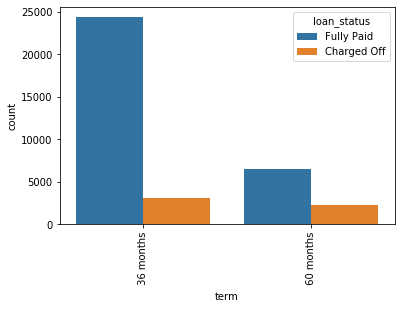

In [379]:
sns.countplot(x='term',hue='loan_status',data=customer_filtered_chargedOff)
plt.xticks(rotation=90)
plt.show()

# most defaults loans are of 36 months period, people tends to pay loans when term is 60 months

## Segmented Univariate Analysis

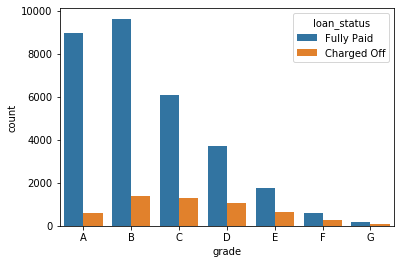

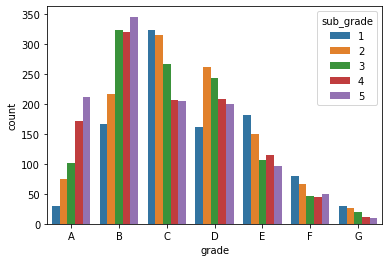

In [380]:
sns.countplot(x='grade',hue='loan_status',order=['A','B','C','D','E','F','G'],data=customer_filtered_chargedOff)
plt.show()


customer_filtered_chargedOff.sub_grade = pd.to_numeric(customer_filtered_chargedOff.sub_grade.apply(lambda x : x[-1]))

sns.countplot(x='grade',hue='sub_grade',order=['A','B','C','D','E','F','G'],data=customer_filtered_chargedOff[customer_filtered_chargedOff['loan_status'] == 'Charged Off'])
plt.show()

# most default loans are from grade B and C.

['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
['RENT' 'OWN' 'MORTGAGE' 'OTHER']


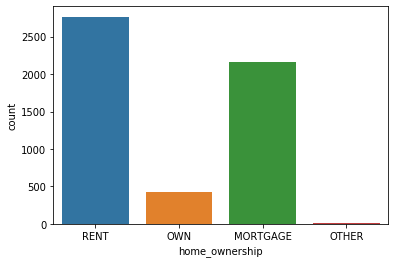

In [381]:
#checking unique values for home_ownership
print(customer_filtered_chargedOff['home_ownership'].unique())

 #replacing 'NONE' with 'OTHERS'
customer_filtered_chargedOff['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

print(customer_filtered_chargedOff['home_ownership'].unique())

sns.countplot(x='home_ownership', data=customer_filtered_chargedOff[customer_filtered_chargedOff['loan_status']=='Charged Off'])
plt.show()

In [382]:


#creating bins for int_rate,open_acc,revol_util,total_acc
customer_filtered_chargedOff['int_rate_groups'] = pd.cut(customer_filtered_chargedOff['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
customer_filtered_chargedOff['open_acc_groups'] = pd.cut(customer_filtered_chargedOff['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])

customer_filtered_chargedOff['total_acc_groups'] = pd.cut(customer_filtered_chargedOff['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
customer_filtered_chargedOff['annual_inc_groups'] = pd.cut(customer_filtered_chargedOff['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])



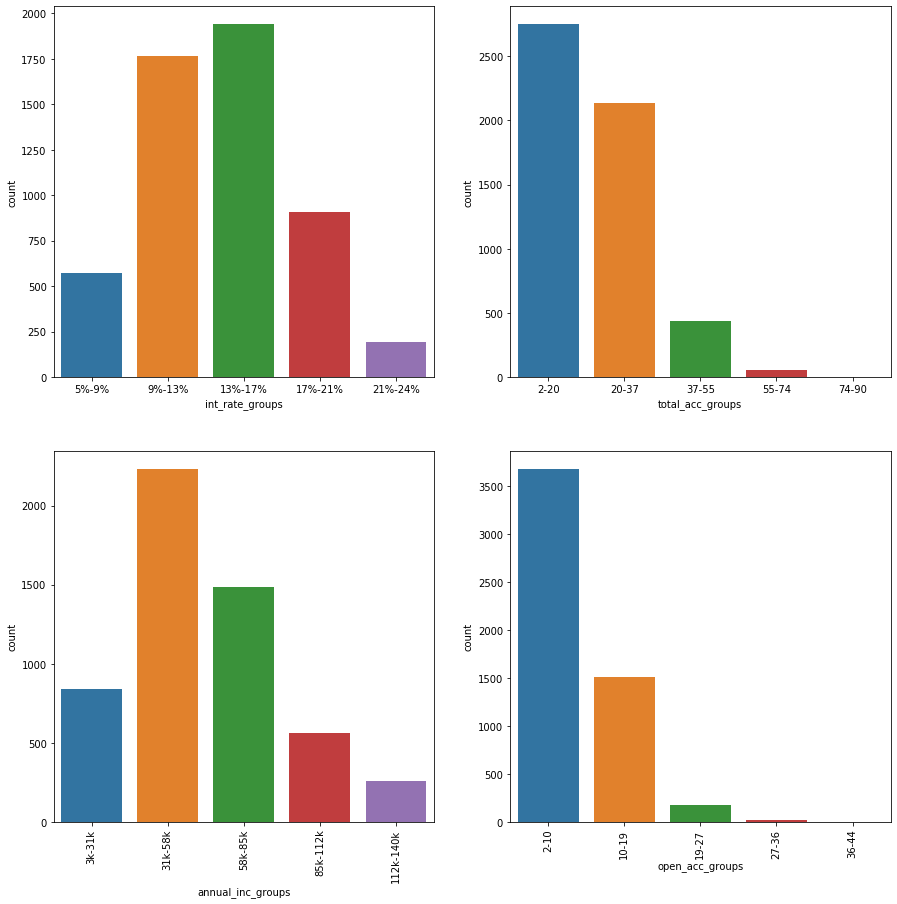

In [383]:


plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=customer_filtered_chargedOff[customer_filtered_chargedOff['loan_status'] == 'Charged Off'])
plt.subplot(222)
sns.countplot(x='total_acc_groups', data=customer_filtered_chargedOff[customer_filtered_chargedOff['loan_status'] == 'Charged Off'])
plt.subplot(223)
sns.countplot(x='annual_inc_groups', data=customer_filtered_chargedOff[customer_filtered_chargedOff['loan_status'] == 'Charged Off'])
plt.xticks(rotation=90)
plt.subplot(224)
sns.countplot(x='open_acc_groups', data=customer_filtered_chargedOff[customer_filtered_chargedOff['loan_status'] == 'Charged Off'])
plt.xticks(rotation=90)
plt.show()
# most default loans are 13.6 % average

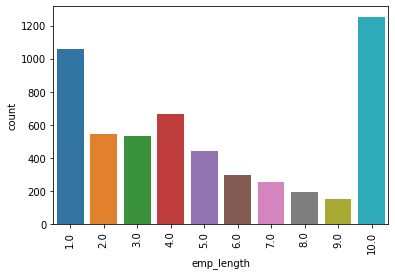

In [384]:
sns.countplot(x='emp_length',data=customer_filtered_chargedOff[customer_filtered_chargedOff['loan_status'] == 'Charged Off'])
plt.xticks(rotation = 90)
plt.show()

# Most Defaulters have employment length of 1 or 10 years.

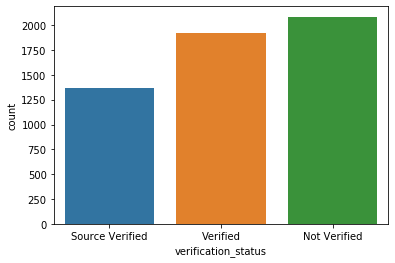

In [385]:
sns.countplot(x='verification_status', data=customer_filtered_chargedOff[customer_filtered_chargedOff['loan_status']=='Charged Off'])
plt.show()

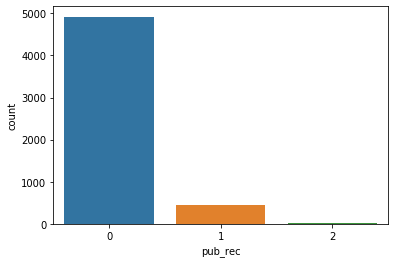

In [386]:
sns.countplot(x='pub_rec', data=customer_filtered_chargedOff[customer_filtered_chargedOff['loan_status']=='Charged Off'])

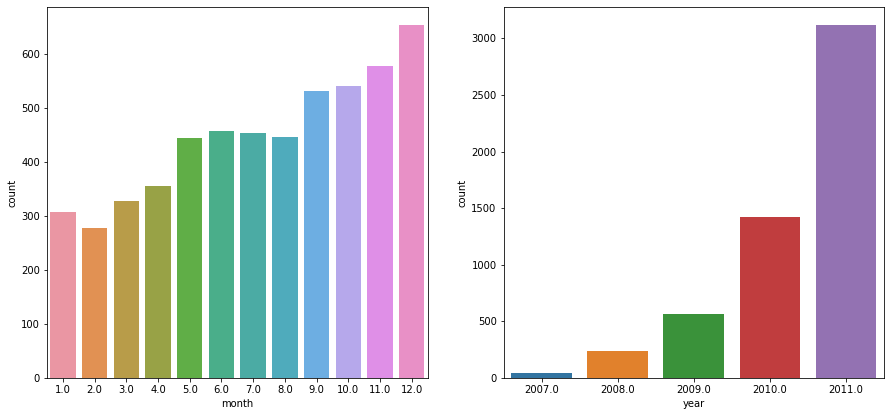

In [387]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='month', data=customer_filtered_chargedOff[customer_filtered_chargedOff['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='year', data=customer_filtered_chargedOff[customer_filtered_chargedOff['loan_status']=='Charged Off'])
plt.show()

In [388]:
customer_filtered_chargedOff['funded_amnt_inv_group'] = pd.cut(customer_filtered_chargedOff['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
customer_filtered_chargedOff['loan_amnt_groups'] = pd.cut(customer_filtered_chargedOff['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
customer_filtered_chargedOff['dti_groups'] = pd.cut(customer_filtered_chargedOff['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

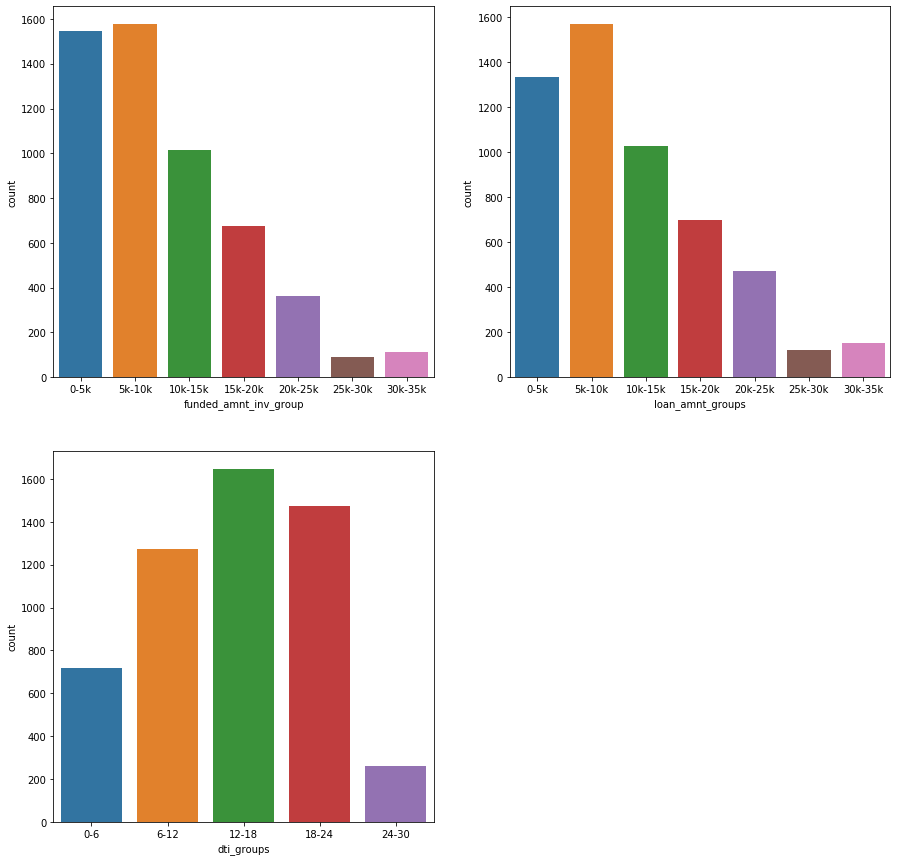

In [389]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='funded_amnt_inv_group', data=customer_filtered_chargedOff[customer_filtered_chargedOff['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='loan_amnt_groups', data=customer_filtered_chargedOff[customer_filtered_chargedOff['loan_status']=='Charged Off'])
plt.subplot(223)
sns.countplot(x='dti_groups', data=customer_filtered_chargedOff[customer_filtered_chargedOff['loan_status']=='Charged Off'])
plt.show()

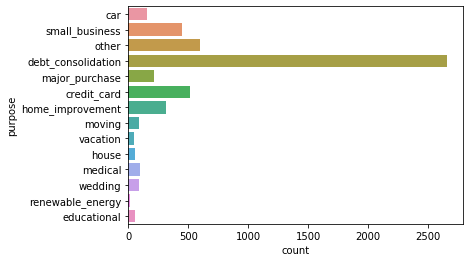

In [390]:
sns.countplot(y ='purpose', data=customer_filtered_chargedOff[customer_filtered_chargedOff['loan_status'] == 'Charged Off'])


# Observations
### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when :

- Candidate having house_ownership as 'RENT'
- Candidate who use the loan to clear other debts
- Candidate who receive interest at the rate of 13-17%
- Candidate who have an income of range 31201 - 58402
- Candidate who have 20-37 open_acc
- Candidate with employement length of 10
- When funded amount by investor is between 5000-10000
- Loan amount is between 5429 - 10357
- Dti is between 12-18
- Term of 36 months
- When the loan status is Not verified
- When the number of derogatory public records is 0
- When the purpose is 'debt_consolidation'
- Grade is 'B'
- And a total grade of 'B5' level.

### Also there is a very interesting observation from the date issued. The late months of an year indicated the high possibility of defaulting.
- The high number of loan defaulted in 2011.


## Bivariate Analysis

### Analysing loan_amount with other columns for more insights


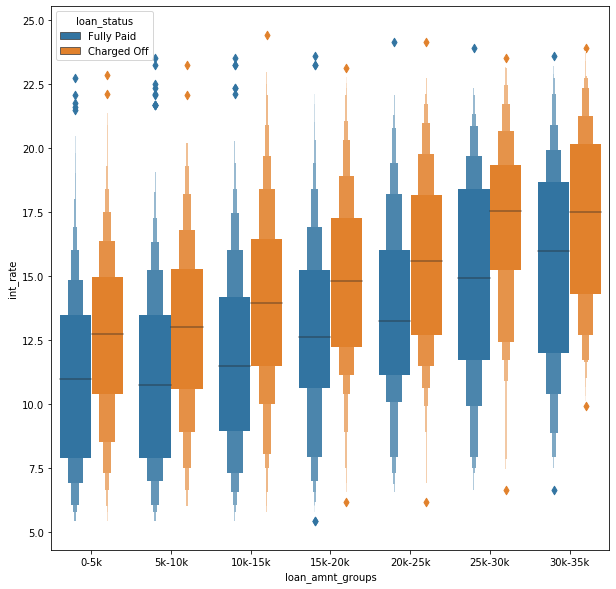

In [69]:
plt.figure(figsize=(10,10))
sns.boxenplot(data =customer_filtered_chargedOff,x='loan_amnt_groups', y='int_rate', hue = 'loan_status')
plt.show()

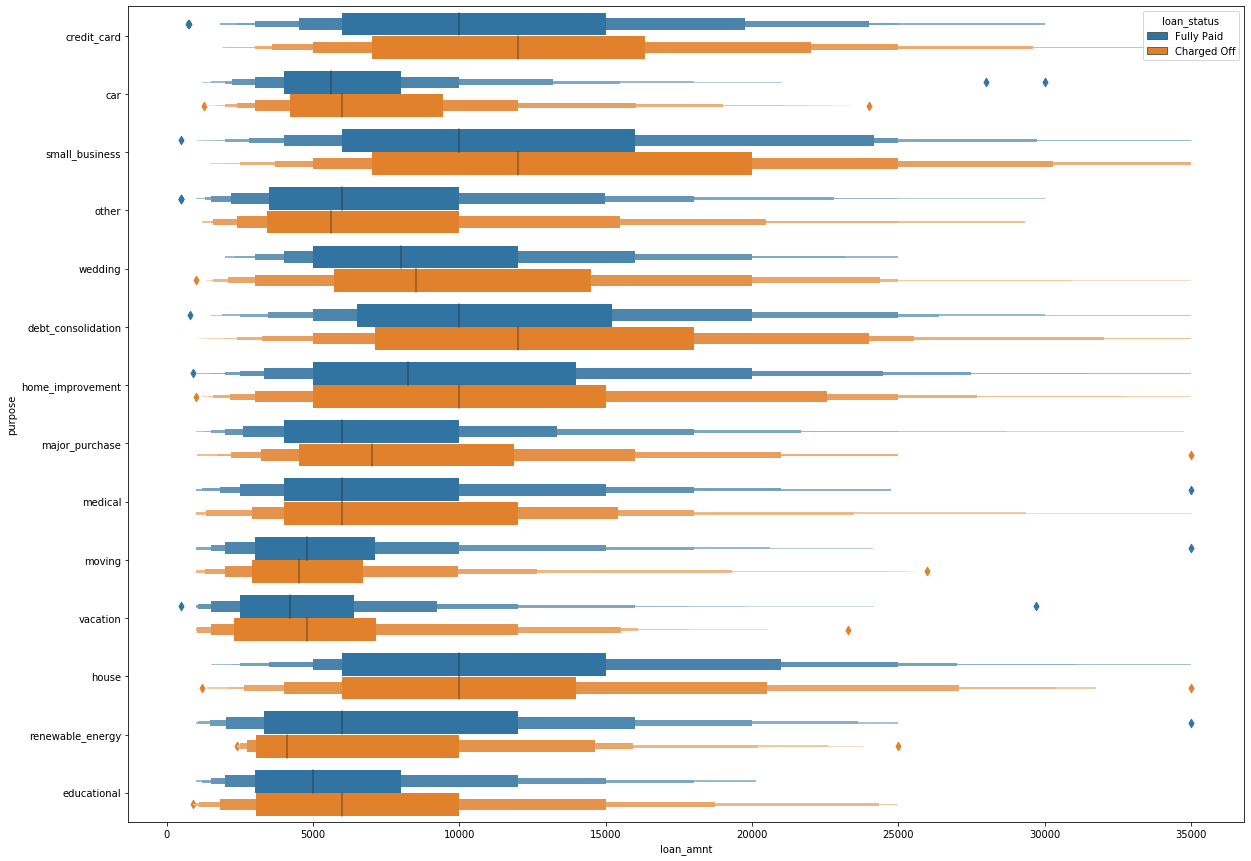

In [68]:
plt.figure(figsize=(20,15))
sns.boxenplot(data =customer_filtered_chargedOff,x='loan_amnt', y='purpose', hue ='loan_status')
plt.show()

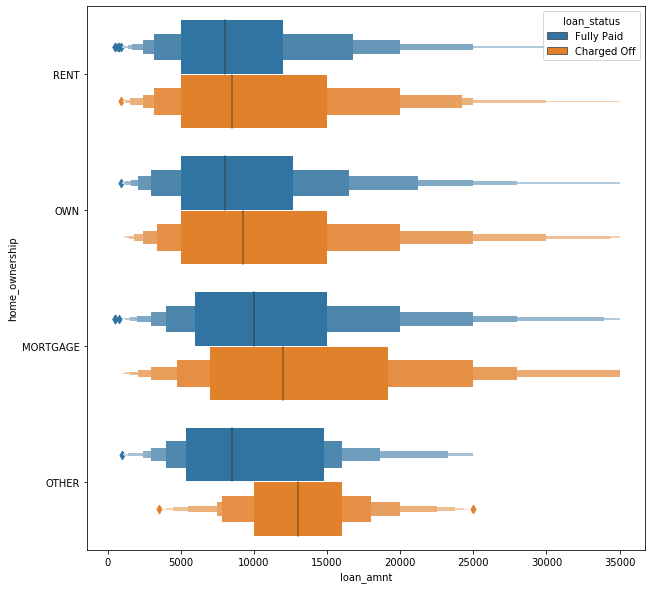

In [67]:
plt.figure(figsize=(10,10))
sns.boxenplot(data =customer_filtered_chargedOff,x='loan_amnt', y='home_ownership', hue ='loan_status')
plt.show()

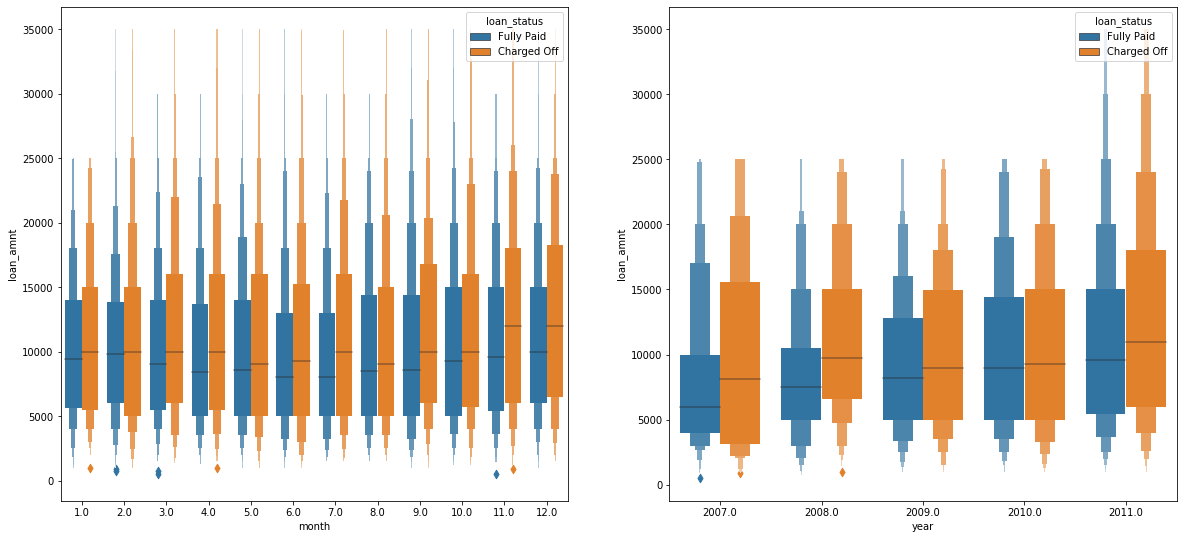

In [66]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.boxenplot(data =customer_filtered_chargedOff,y='loan_amnt', x='month', hue ='loan_status')
plt.subplot(222)
sns.boxenplot(data =customer_filtered_chargedOff,y='loan_amnt', x='year', hue ='loan_status')
plt.show()

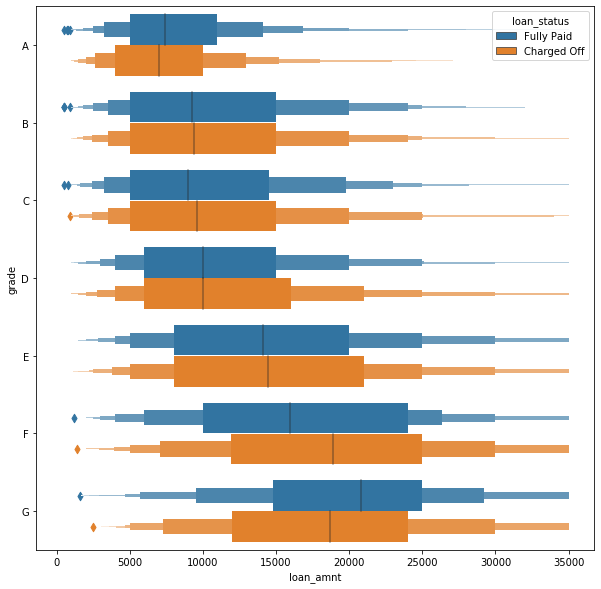

In [83]:
plt.figure(figsize=(10,10))
sns.boxenplot(data =customer_filtered_chargedOff,x='loan_amnt', y='grade', hue ='loan_status',order=['A','B','C','D','E','F','G'])
plt.show()

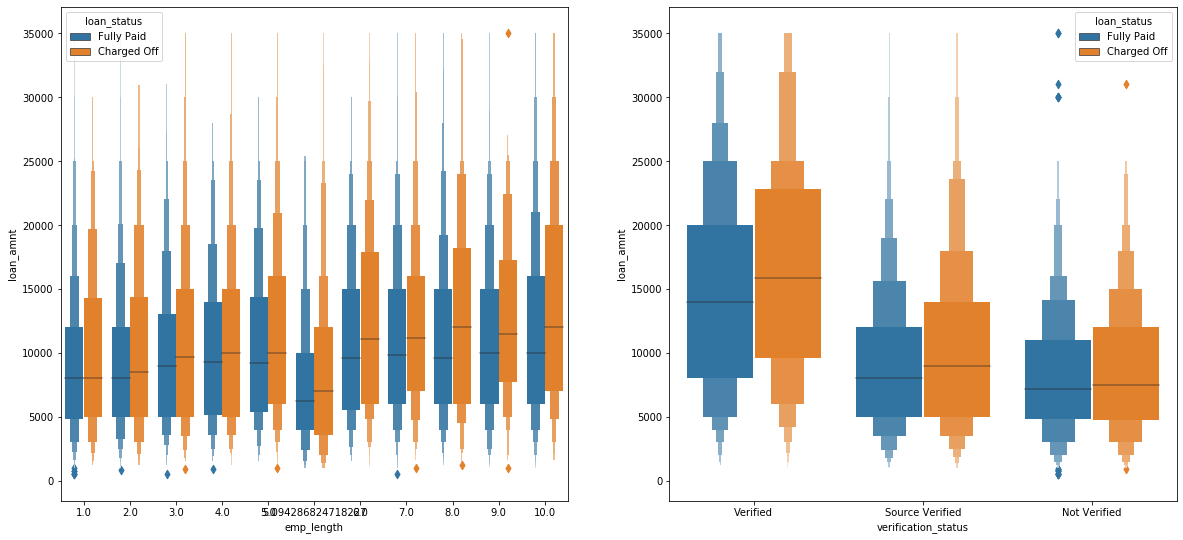

In [73]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.boxenplot(data =customer_filtered_chargedOff,y='loan_amnt', x='emp_length', hue ='loan_status')
plt.subplot(222)
sns.boxenplot(data =customer_filtered_chargedOff,y='loan_amnt', x='verification_status', hue ='loan_status')

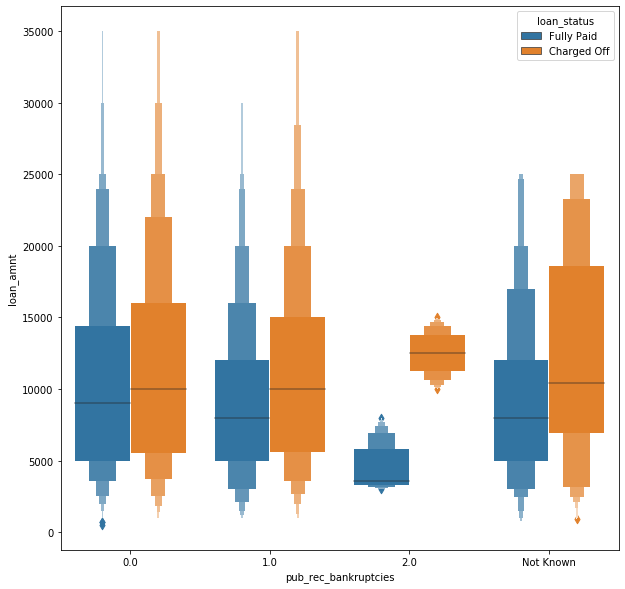

In [324]:
plt.figure(figsize=(10,10))
sns.boxenplot(data =customer_filtered_chargedOff,x='pub_rec_bankruptcies', y='loan_amnt', hue ='loan_status')
plt.show()

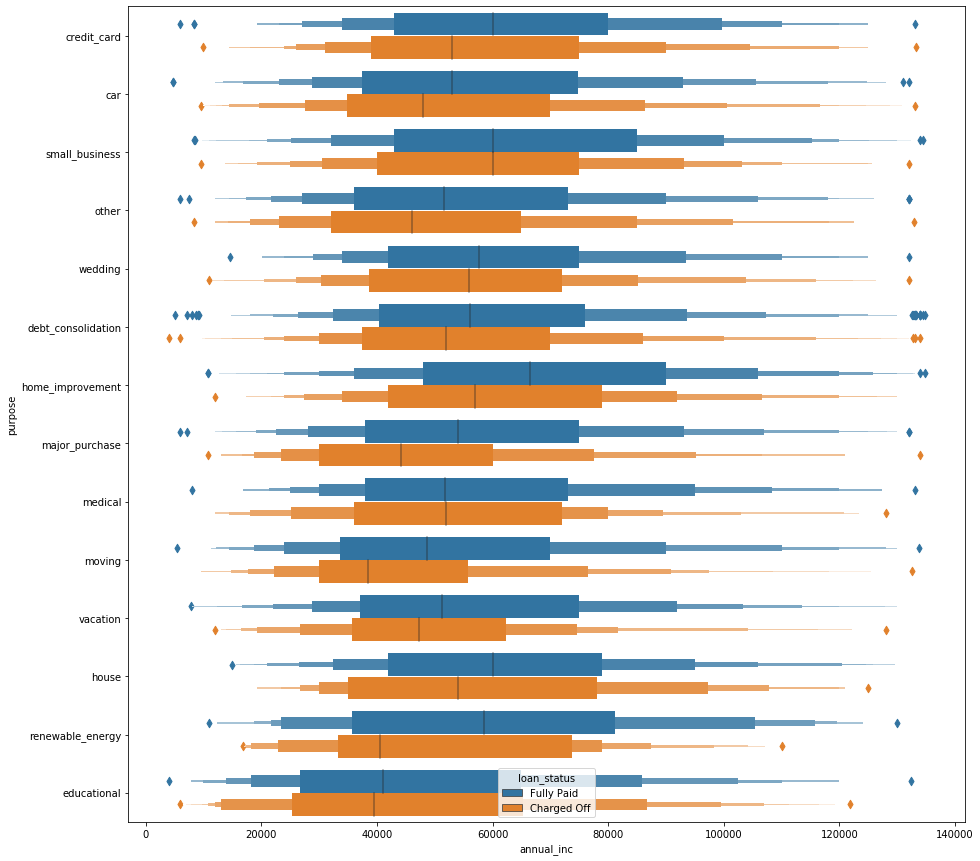

In [79]:
plt.figure(figsize=(15,15))
sns.boxenplot(data =customer_filtered_chargedOff,x='annual_inc', y='purpose', hue ='loan_status')
plt.show()

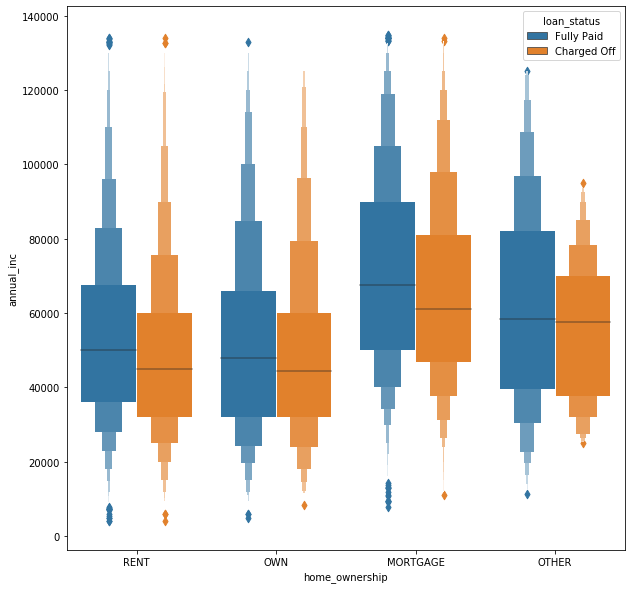

In [84]:
plt.figure(figsize=(10,10))
sns.boxenplot(data =customer_filtered_chargedOff,x='home_ownership', y='annual_inc', hue ='loan_status')
plt.show()


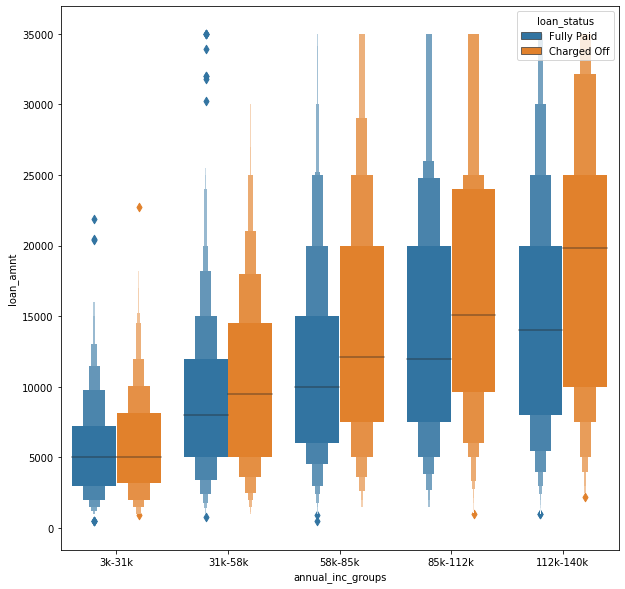

In [88]:
plt.figure(figsize=(10,10))
sns.boxenplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = customer_filtered_chargedOff)
plt.show()

### The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.

- This can be a pretty strong driving factor for loan defaulting.



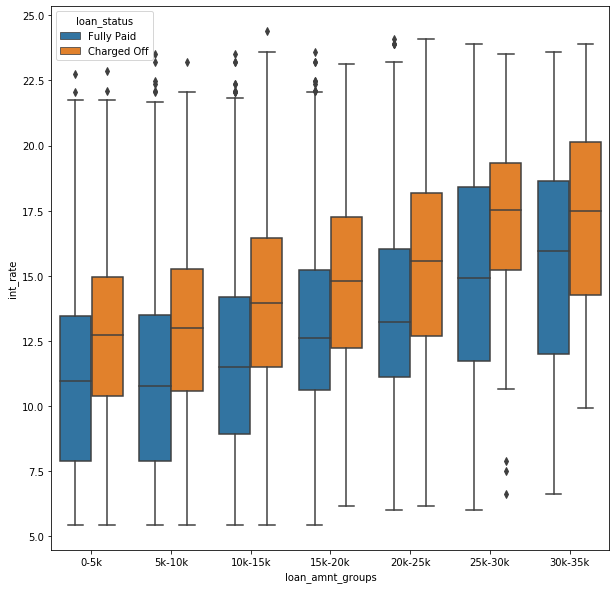

In [97]:
plt.figure(figsize=(10,10))
sns.boxplot(data =customer_filtered_chargedOff,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status')
plt.show()

### Applicants who applied and defaulted have no significant difference in loan_amounts.

- Which means that candidates applying for long term has applied for more loan.

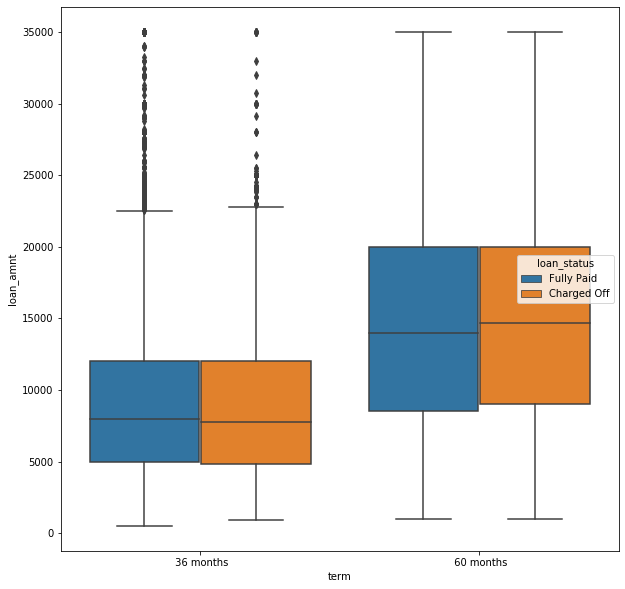

In [93]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'term', y = 'loan_amnt', data = customer_filtered_chargedOff,hue = 'loan_status')
plt.show()

# Multivariate Analysis

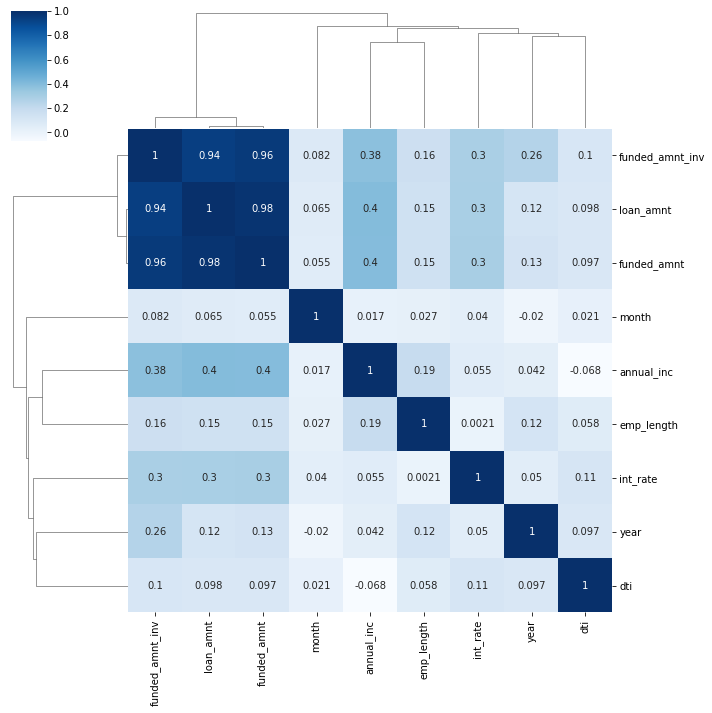

In [191]:
customer_numerical_variable_corr = customer_data_set[numerical_coln].corr()

customer_numerical_variable_corr

sns.clustermap(data=customer_numerical_variable_corr,cmap="Blues",annot=True)
plt.show()

# Observation is that Loan amount, investor amount, funding amount, installment, total payment are strongly correlated.
# Annual income with DTI(Debt-to-income ratio) is negatively correalted, That means when annual income is low DTI is high & vice versa.
# positive correlation between annual income and employment years,this means income increases with work experience

# Observations
## The above analysis with respect to the charged off loans. There is a more probability of defaulting when :

- Candidates taking loan for 'home improvement' and have income of 60k -70k
- Candiadtes whose home ownership is 'MORTGAGE and have income of 60-70k
- Candidates who receive interest at the rate of 21-24% and have an income of 70k-80k
- Candiadtes who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
- Candidates who have taken a loan for small business and the loan amount is greater than 14k
- Candidates whose home ownership is 'MORTGAGE and have loan of 14-16k
- When grade is F and loan amount is between 15k-20k
- When employment length is 10yrs and loan amount is 12k-14k
- When the loan is verified and loan amount is above 16k
- For grade G and interest rate above 20%
- When pub_rec_bankruptcies is 2.

